# ADVANCED PROBLEMS IN PYTHON

## File and folder handling

### Basic operations on folders

In [2]:
# Import the os module (provides functions for interacting with the operating system)
import os  

# Import the tempfile module (used to create temporary files and directories)
import tempfile

In [3]:
# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Change the current working directory (in this case, change to the same path)
os.chdir(cwd)
print("Changed working directory to:", cwd)

Current working directory: /Users/mac
Changed working directory to: /Users/mac


In [4]:
# Get the system temporary directory
tmpdir = tempfile.gettempdir()
print("System temporary directory:", tmpdir)

# Join paths: create a new path inside the temporary directory
mytmpdir = os.path.join(tmpdir, "foobar")
print("Joined path inside temp directory:", mytmpdir)

System temporary directory: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T
Joined path inside temp directory: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar


In [26]:
# Get the system temporary directory
tmpdir = tempfile.gettempdir()

# Join paths: create a new path inside the temporary directory
mytmpdir = os.path.join(tmpdir, "foobar")

# Create a directory path: {tmpdir}/foobar/plop/toto
# The parameter exist_ok=True ensures no error is raised if the directory already exists.
os.makedirs(os.path.join(tmpdir, "foobar", "plop", "toto"), exist_ok=True)

# Print the path of the parent directory we created
print("Parent directory path:", mytmpdir)

# List the contents of the parent directory
print("Contents of", mytmpdir, ":", os.listdir(mytmpdir))

Parent directory path: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar
Contents of /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar : ['plop']


### File import/export

In [30]:
# Create a file path {mytmpdir}/myfile.txt
filename = os.path.join(mytmpdir, "myfile.txt")
print("File path created:", filename, "...")  # Print the full file path

# Write content to the file line by line
lines = ["Dans python tout est bon", "Enfin, presque"]
fd = open(filename, "w")                 # Open file in write mode
fd.write(lines[0] + "\n")                 # Write the first line with newline
fd.write(lines[1] + "\n")                 # Write the second line with newline
fd.close()                               # Close the file after writing

# Read content of the file line by line
f = open(filename, "r")                   # Open file in read mode
print("First line:", f.readline().strip(), "...")   # Read and print the first line
print("Second line:", f.readline().strip(), "...")  # Read and print the second line
f.close()                                # Close the file after reading

# Read all lines at once (returns a list of lines)
f = open(filename, 'r')
print("All lines:", f.readlines(), "...")  # Read and print all lines
f.close()

# Use context manager to read file (auto closes the file after block ends)
with open(filename, 'r') as f:
    lines = [line for line in f]          # Store all lines into a list
    print("All lines with context manager:", lines, "...")


File path created: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/myfile.txt ...
First line: Dans python tout est bon ...
Second line: Enfin, presque ...
All lines: ['Dans python tout est bon\n', 'Enfin, presque\n'] ...
All lines with context manager: ['Dans python tout est bon\n', 'Enfin, presque\n'] ...


### Browse files and folders

In [31]:
# --- Define the folder path {tmpdir}/foobar ---
tmpdir = tempfile.gettempdir()
folder = os.path.join(tmpdir, "foobar")

# --- Recursively walk through the directory ---
# os.walk() yields a tuple (dirpath, dirnames, filenames)
for dirpath, dirnames, filenames in os.walk(folder): 
    print("Currently visiting directory:", dirpath, "...")
    print("  - Subdirectories inside:", dirnames, "...")
    print("  - Files inside:", filenames, "...")

Currently visiting directory: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar ...
  - Subdirectories inside: [] ...
  - Files inside: ['myfile.txt'] ...


### Search for files by pattern

In [37]:
import glob
import tempfile

# --- Get the system temporary directory ---
tmpdir = tempfile.gettempdir()

# --- Find all files with the pattern {tmpdir}/*/*.txt ---
# This means: look inside every subdirectory of tmpdir (one level deep)
# and collect all files ending with ".txt".
filenames = glob.glob(os.path.join(tmpdir, "*", "*.txt"))

# --- Print the list of matching files ---
print("List of .txt files found inside subdirectories of tmpdir:", filenames, "...")


List of .txt files found inside subdirectories of tmpdir: ['/var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/plop2/myfile.txt', '/var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/myfile.txt'] ...


In [38]:
# --- Get file information ---
# Take the first file path from the list of found files
filepath = filenames[0]
print("Full file path:", filepath, "...")

# --- Split the file path into directory and file name ---
dirname, filename = os.path.split(filepath)
print("Directory:", dirname, "- Filename:", filename, "...")

# --- Split the file name into basename and extension ---
basename, extfile = os.path.splitext(filename)
print("Basename:", basename, "- Extension:", extfile, "...")

Full file path: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/plop2/myfile.txt ...
Directory: /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/plop2 - Filename: myfile.txt ...
Basename: myfile - Extension: .txt ...


### Copy files, folders

In [43]:
import shutil

# Define source and destination file paths
src = os.path.join(tmpdir, "foobar", "myfile.txt")
dst = os.path.join(tmpdir, "foobar", "plop", "myfile.txt")
print("Copy file from %s to %s ..." % (src, dst))

# Copy file from src to dst
# shutil.copy(src, dst)

# Check if destination file exists after copy
print("Does file %s exist? ..." % dst, os.path.exists(dst))

# Define source and destination directories
src = os.path.join(tmpdir, "foobar", "plop")
dst = os.path.join(tmpdir, "plop2")

print("Copy entire folder tree from %s to %s ..." % (src, dst))

# Perform directory operations: copy tree, remove tree, and move folder
try:
    shutil.copytree(src, dst)   # Copy entire directory tree
    print("Directory tree copied successfully ...")

    shutil.rmtree(dst)          # Remove the copied directory
    print("Copied directory removed successfully ...")

    shutil.move(src, dst)       # Move the source directory to a new destination
    print("Directory moved successfully ...")

except (FileExistsError, FileNotFoundError) as e:
    print("Error occurred during directory operations:", e, "...")


Copy file from /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/myfile.txt to /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/plop/myfile.txt ...
Does file /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/plop/myfile.txt exist? ... False
Copy entire folder tree from /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/plop to /var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/plop2 ...
Error occurred during directory operations: [Errno 2] No such file or directory: '/var/folders/zx/0my630tn7z3_6cjh_7bbt0x40000gn/T/foobar/plop' ...


## Object Oriented Programming
### Object Oriented Principles:

- Encapsulate: package data (attributes) and source code (methods) into objects.
- Class: a form to create separate objects with the same data and source code.
- Object: a defined entity of a Class.
- Inheritance: allows classes to inherit common states and behaviors of the parent class (reuse source code)
- Polymorphism: call the corresponding method of the owning entity even though it inherits that method from the - parent class (helps the program be extensible - meaning the programmer can inherit and re-declare methods from the parent class with new processing behavior).

In [44]:
import math

# Build the parent class
class Shape2D:
    def area(self):  # Common method "area" (to be overridden in subclasses)
        raise NotImplementedError()

# Inheritance + Encapsulation
class Square(Shape2D):  # Inherits from Shape2D
    def __init__(self, width):  # Constructor method
        self.width = width
    
    def area(self):  # Polymorphism: override "area" of the parent class
        return self.width ** 2

class Disk(Shape2D):  # Inherits from Shape2D
    def __init__(self, radius):  # Constructor method
        self.radius = radius
    
    def area(self):  # Polymorphism: override "area" of the parent class
        return math.pi * self.radius ** 2

# Create a list of shapes (Square and Disk)
shapes = [Square(2), Disk(3)]

# Polymorphism: call the "area" method of each subclass
print("Areas of shapes (Square(2), Disk(3)) ...", [s.area() for s in shapes])
# Output will be: [4, 28.274333882308138]

# If we try to call "area()" on the base class directly, it will raise an error
s = Shape2D()
try:
    s.area() 
except NotImplementedError as e:
    print("Calling Shape2D().area() ... NotImplementedError:", e)

Areas of shapes (Square(2), Disk(3)) ... [4, 28.274333882308138]
Calling Shape2D().area() ... NotImplementedError: 


# SCIENTIFIC COMPUTING LIBRARY

## Numpy: array and matrix processing library

In [48]:
# Enable Python 3 print() in Python 2 and import numpy for numerical operations
from __future__ import print_function
import numpy as np

### Create array

In [49]:
# Create arrays from lists, convert 2D arrays back to lists, and print types and contents
# 1D array example
data1 = [1, 2, 3, 4, 5]            # Original Python list
arr1 = np.array(data1)             # Convert list to numpy array (1D)
print(f"arr1: {type(arr1)}\n{arr1}\n")  # Print type and contents of arr1

# 2D array example
data2 = [range(1, 5), range(5, 9)] # List of ranges to form 2D structure
arr2 = np.array(data2)             # Convert list of ranges to numpy 2D array
print(f"arr2: {type(arr2)}\n{arr2}\n")  # Print type and contents of arr2

# Convert numpy array back to list
lst = arr2.tolist()                # Convert 2D numpy array back to standard Python list
print(f'List: {type(lst)} {lst}') # Print type and contents of the list


arr1: <class 'numpy.ndarray'>
[1 2 3 4 5]

arr2: <class 'numpy.ndarray'>
[[1 2 3 4]
 [5 6 7 8]]

List: <class 'list'> [[1, 2, 3, 4], [5, 6, 7, 8]]


### Create special array

In [54]:
# Create arrays with predefined values and print full details
arr_zeros_1d = np.zeros(10)            # 1D array with 10 zeros
print(f"1D zeros array: {arr_zeros_1d}, shape: {arr_zeros_1d.shape}, dtype: {arr_zeros_1d.dtype}")

arr_zeros_2d = np.zeros((3, 6))        # 2D array with 3 rows, 6 columns, all zeros
print(f"2D zeros array: \n{arr_zeros_2d}, shape: {arr_zeros_2d.shape}, dtype: {arr_zeros_2d.dtype}")

arr_ones = np.ones(10)                  # 1D array with 10 ones
print(f"1D ones array: {arr_ones}, shape: {arr_ones.shape}, dtype: {arr_ones.dtype}")

arr_linspace = np.linspace(0, 1, 5)    # 5 evenly spaced numbers from 0 to 1
print(f"Linspace array: {arr_linspace}, shape: {arr_linspace.shape}, dtype: {arr_linspace.dtype}")

arr_logspace = np.logspace(0, 3, 4)    # 4 numbers logarithmically spaced from 10^0 to 10^3
print(f"Logspace array: {arr_logspace}, shape: {arr_logspace.shape}, dtype: {arr_logspace.dtype}")

1D zeros array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape: (10,), dtype: float64
2D zeros array: 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]], shape: (3, 6), dtype: float64
1D ones array: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape: (10,), dtype: float64
Linspace array: [0.   0.25 0.5  0.75 1.  ], shape: (5,), dtype: float64
Logspace array: [   1.   10.  100. 1000.], shape: (4,), dtype: float64


In [55]:
# Convert an integer array to float and print full details
int_array = np.arange(5)                # Create integer array: [0, 1, 2, 3, 4]
float_array = int_array.astype(float)   # Cast integers to floats: [0.0, 1.0, 2.0, 3.0, 4.0]
print(f"Original int array: {int_array}, dtype: {int_array.dtype}")  # Print int array and type
print(f"Converted float array: {float_array}, dtype: {float_array.dtype}")  # Print float array and type

Original int array: [0 1 2 3 4], dtype: int64
Converted float array: [0. 1. 2. 3. 4.], dtype: float64


### Check array properties

In [56]:
# Print full details of array properties
print(f"arr1 dtype: {arr1.dtype}")       # Data type of arr1 (e.g., float64)
print(f"arr2 ndim: {arr2.ndim}")         # Number of dimensions of arr2 (2)
print(f"arr2 shape: {arr2.shape}")       # Shape of arr2: 2 rows x 4 columns
print(f"arr2 size: {arr2.size}")         # Total number of elements in arr2: 8
print(f"len(arr2): {len(arr2)}")         # Length of first dimension (number of rows: 2)

arr1 dtype: int64
arr2 ndim: 2
arr2 shape: (2, 4)
arr2 size: 8
len(arr2): 2


### Reshape

In [57]:
# Create a float array, reshape it to 2D, and print full details
arr = np.arange(10, dtype=float)  
# arr: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape: (10,), type: float64
print(f"Original arr: {arr}, shape: {arr.shape}, dtype: {arr.dtype}")

arr = arr.reshape((2, 5))          
# arr reshaped: [[0. 1. 2. 3. 4.]
#                [5. 6. 7. 8. 9.]], shape: (2,5), type: float64
print(f"Reshaped arr: {arr}, shape: {arr.shape}, dtype: {arr.dtype}")

Original arr: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape: (10,), dtype: float64
Reshaped arr: [[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]], shape: (2, 5), dtype: float64


In [58]:
# Add a new axis to a 1D array, then transpose and print full details
a = np.array([0, 1])                    
print(f"Before adding new axis: {a}, shape: {a.shape}")  # Original 1D array, shape (2,)

a_col = a[:, np.newaxis]                # Add a new axis to convert to 2D column (shape: (2,1))
# or a_col = a[:, None]                 # Alternative syntax
print(f"After adding new axis: shape={a_col.shape}\n{a_col}")  # Print column array

a_transpose = a_col.T                    # Transpose column to row (shape: (1,2))
print(f"Transpose: shape={a_transpose.shape} - {a_transpose}") # Print transposed array


Before adding new axis: [0 1], shape: (2,)
After adding new axis: shape=(2, 1)
[[0]
 [1]]
Transpose: shape=(1, 2) - [[0 1]]


In [59]:
# Flatten a multi-dimensional array to 1D (creates a copy), modify it, and print full details
arr_flt = arr.flatten()                  # Flatten arr to 1D copy
arr_flt[0] = 33                          # Modify first element of flattened array
print(f"Flattened and modified array: {arr_flt}")  # Print modified flattened array
print(f"Original array unchanged: {arr}")         # Print original array to show it is unchanged

Flattened and modified array: [33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
Original array unchanged: [[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


In [60]:
# Ravel a multi-dimensional array to 1D (returns a view), modify it, and print full details
arr_flt = arr.ravel()                     # Flatten arr to 1D view (no copy)
arr_flt[0] = 33                           # Modify first element of flattened view
print(f"Raveled and modified array: {arr_flt}")  # Print raveled array
print(f"Original array affected: {arr}")         # Print original array to show it is modified

Raveled and modified array: [33.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
Original array affected: [[33.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


### Array access

In [61]:
# Create a 1D array and reshape it to 3D, then print full details
x = np.arange(2 * 3 * 4)                  # 1D array with values [0, 1, ..., 23], total 24 elements
print(f"x before reshape: shape={x.shape} - {x}")  # Print shape and contents of 1D array

x = x.reshape(2, 3, 4)                    # Reshape to 3D array: 2 blocks, 3 rows, 4 columns
print(f"x after reshape: shape={x.shape}\n{x}")   # Print shape and contents of 3D array

x before reshape: shape=(24,) - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
x after reshape: shape=(2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [62]:
# Select all elements in the first "block" along axis 0 and print full details
print(f"Elements at index 0 along axis 0:\n{x[0, :, :]}")  
# x[0, :, :] selects the first 2D slice (first block) of the 3D array x

Elements at index 0 along axis 0:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [63]:
# Select all elements in the first row along axis 1 and print full details
print(f"Elements at index 0 along axis 1 (first row of each block):\n{x[:, 0, :]}")  
# x[:, 0, :] selects the first row from each 2D block in the 3D array x

Elements at index 0 along axis 1 (first row of each block):
[[ 0  1  2  3]
 [12 13 14 15]]


In [65]:
# Select all elements in the first column along axis 2 and print full details
print(f"Elements at index 0 along axis 2 (first column of each row in each block):\n{x[:, :, 0]}")  
# x[:, :, 0] selects the first column from each row in every 2D block of the 3D array x

Elements at index 0 along axis 2 (first column of each row in each block):
[[ 0  4  8]
 [12 16 20]]


### Merge 2 arrays

In [66]:
# Create two 1D arrays and print full details
a = np.array([0, 1])                       # 1D array with elements [0, 1]
b = np.array([2, 3])                       # 1D array with elements [2, 3]
print(f"a: {a}, shape: {a.shape}, dtype: {a.dtype}")  # Print array a details
print(f"b: {b}, shape: {b.shape}, dtype: {b.dtype}")  # Print array b details

a: [0 1], shape: (2,), dtype: int64
b: [2 3], shape: (2,), dtype: int64


In [67]:
# Horizontally stack two 1D arrays and print full details
hstack_arr = np.hstack([a, b])             # Concatenate arrays a and b along horizontal axis (1D)
print(f"Horizontal stack: {hstack_arr}, shape: {hstack_arr.shape}, dtype: {hstack_arr.dtype}")

Horizontal stack: [0 1 2 3], shape: (4,), dtype: int64


In [68]:
# Vertically stack two 1D arrays and print full details
vstack_arr = np.vstack([a, b])             # Stack arrays a and b along vertical axis to form 2D array
print(f"Vertical stack:\n{vstack_arr}, shape: {vstack_arr.shape}, dtype: {vstack_arr.dtype}")

Vertical stack:
[[0 1]
 [2 3]], shape: (2, 2), dtype: int64


### Select on array

In [69]:
# Access individual elements and slices in a 2D array and print full details
arr = np.arange(10, dtype=float).reshape((2, 5))  # 2D array with shape (2,5)
print(f"Array:\n{arr}")

print(f"Row 0 (slice): {arr[0]}")                 # Access all elements in row 0
print(f"Element at row 0, column 3: {arr[0, 3]}") # Access single element using comma indexing
print(f"Element at row 0, column 3 (alternative): {arr[0][3]}")  # Access same element using chained indexing

Array:
[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
Row 0 (slice): [0. 1. 2. 3. 4.]
Element at row 0, column 3: 3.0
Element at row 0, column 3 (alternative): 3.0


In [70]:
# Demonstrate slicing in 2D arrays and print full details
# Syntax: start:stop:step (start default 0, stop default last, step default 1)

print(f"Row 0: {arr[0, :]}")            # Select all columns in row 0 (1D array)
print(f"Column 0: {arr[:, 0]}")         # Select all rows in column 0 (1D array)
print(f"First 2 columns: {arr[:, :2]}") # Select first two columns from all rows
print(f"Columns from index 2 onwards: {arr[:, 2:]}") # Select columns from index 2 to end

arr2 = arr[:, 1:4]                       # Select columns 1 to 3 (1-based: 1,2,3) for all rows
print(f"Sliced array (columns 1 to 3):\n{arr2}")

Row 0: [0. 1. 2. 3. 4.]
Column 0: [0. 5.]
First 2 columns: [[0. 1.]
 [5. 6.]]
Columns from index 2 onwards: [[2. 3. 4.]
 [7. 8. 9.]]
Sliced array (columns 1 to 3):
[[1. 2. 3.]
 [6. 7. 8.]]


In [71]:
# Modify an element in a slice (view) and show that original array is affected
arr2[0, 0] = 33                         # Change first element of arr2
print(f"Modified slice arr2:\n{arr2}")  # Print modified slice
print(f"Original array arr after modification:\n{arr}")  # Original arr is updated because slicing returns a view

Modified slice arr2:
[[33.  2.  3.]
 [ 6.  7.  8.]]
Original array arr after modification:
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [72]:
# Reverse the elements of row 0 and print full details
reversed_row = arr[0, ::-1]             # Slice row 0 with step -1 to reverse elements
print(f"Reversed row 0: {reversed_row}") # Print reversed row

Reversed row 0: [ 4.  3.  2. 33.  0.]


In [73]:
# Fancy indexing with integer array returns a copy; modifying it does not affect the original array
arr2 = arr[:, [1, 2, 3]]                 # Select columns 1, 2, 3 from all rows (returns a copy)
print(f"Fancy indexed array (copy):\n{arr2}")

arr2[0, 0] = 44                          # Modify first element of the copy
print(f"Modified fancy indexed array:\n{arr2}")
print(f"Original array arr remains unchanged:\n{arr}")  # Original array is unaffected

Fancy indexed array (copy):
[[33.  2.  3.]
 [ 6.  7.  8.]]
Modified fancy indexed array:
[[44.  2.  3.]
 [ 6.  7.  8.]]
Original array arr remains unchanged:
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [74]:
# Boolean array indexing: select elements based on a condition and print full details
b_filter = arr > 5                        # Create boolean mask where elements greater than 5 are True
print(f"Boolean index mask:\n{b_filter}") 

arr2 = arr[b_filter]                      # Apply mask to get a copy of elements > 5
print(f"Selected elements (copy):\n{arr2}")

arr2[0] = 44                              # Modify first element of the copy
print(f"Modified copy arr2:\n{arr2}")
print(f"Original array arr remains unchanged:\n{arr}")  # Original array is unaffected

Boolean index mask:
[[False  True False False False]
 [False  True  True  True  True]]
Selected elements (copy):
[33.  6.  7.  8.  9.]
Modified copy arr2:
[44.  6.  7.  8.  9.]
Original array arr remains unchanged:
[[ 0. 33.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [75]:
# Boolean indexing with string arrays and printing full details
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])  

b_filter = names == 'Bob'                   # Create boolean mask where name is 'Bob'
print(f"Boolean index for 'Bob':\n{b_filter}")

arr1 = names[names != 'Bob']               # Select elements not equal to 'Bob' (returns a copy)
print(f"Elements not 'Bob':\n{arr1}")

b_filter1 = (names == 'Bob') | (names == 'Will')  # Boolean mask using OR operator
print(f"Boolean index for 'Bob' or 'Will':\n{b_filter1}")

names[names != 'Bob'] = 'Joe'              # Modify elements not 'Bob' to 'Joe'
print(f"Modified names array:\n{names}")

arr2 = np.unique(names)                     # Get unique elements from names
print(f"Unique elements:\n{arr2}")

Boolean index for 'Bob':
[ True False False  True]
Elements not 'Bob':
['Joe' 'Will']
Boolean index for 'Bob' or 'Will':
[ True False  True  True]
Modified names array:
['Bob' 'Joe' 'Joe' 'Bob']
Unique elements:
['Bob' 'Joe']


### Array operations

In [76]:
# Demonstrate element-wise operations, statistics, boolean methods, and random numbers in NumPy

nums = np.arange(5)                       
print(f"Original nums: {nums}")

print(f"nums * 10 (element-wise multiplication): {nums * 10}")  # Multiply each element by 10

nums = np.sqrt(nums)                        # Square root of each element
print(f"Square root of nums: {nums}")

print(f"Ceil of nums: {np.ceil(nums)}")     # Round each element up to nearest integer
print(f"Check NaN in nums: {np.isnan(nums)}") # Check for NaN in array

print(f"Element-wise addition: {nums + np.arange(5)}") # Add arrays element-wise

print(f"Element-wise maximum: {np.maximum(nums, np.array([1, -2, 3, -4, 5]))}") # Compare element-wise

# Compute Euclidean distance between two vectors
vec1 = np.random.randn(10)                  # Random normal vector of size 10
vec2 = np.random.randn(10)                  # Another random normal vector of size 10
dist = np.sqrt(np.sum((vec1 - vec2) ** 2))  # Euclidean distance
print(f"Euclidean distance between vec1 and vec2: {dist}")

# Math and statistics on arrays
rnd = np.random.randn(4, 2)                 # 4x2 array of random normal numbers
print(f"Random 4x2 array:\n{rnd}")
print(f"Mean: {rnd.mean()}, Std: {rnd.std()}")
print(f"Index of minimum element: {rnd.argmin()}")
print(f"Sum of all elements: {rnd.sum()}")
print(f"Sum of columns: {rnd.sum(axis=0)}")
print(f"Sum of rows: {rnd.sum(axis=1)}")

# Methods for boolean arrays
print(f"Number of positive values: {(rnd > 0).sum()}")
print(f"Any positive? {(rnd > 0).any()}")
print(f"All positive? {(rnd > 0).all()}")

# Random numbers generation
np.random.seed(12234)                       # Set seed for reproducibility
print(f"Random 2x3 array in [0,1]:\n{np.random.rand(2, 3)}")
print(f"Random normal vector of size 10: {np.random.randn(10)}")
print(f"Random integers 0 or 1, size 10: {np.random.randint(0, 2, 10)}")

Original nums: [0 1 2 3 4]
nums * 10 (element-wise multiplication): [ 0 10 20 30 40]
Square root of nums: [0.         1.         1.41421356 1.73205081 2.        ]
Ceil of nums: [0. 1. 2. 2. 2.]
Check NaN in nums: [False False False False False]
Element-wise addition: [0.         2.         3.41421356 4.73205081 6.        ]
Element-wise maximum: [1.         1.         3.         1.73205081 5.        ]
Euclidean distance between vec1 and vec2: 4.118382459327125
Random 4x2 array:
[[ 0.49184724 -0.13294512]
 [-0.27616913 -0.17131066]
 [-0.07767935 -1.16753399]
 [-2.30927779  0.52309626]]
Mean: -0.3899965681421834, Std: 0.8749278238004925
Index of minimum element: 6
Sum of all elements: -3.1199725451374674
Sum of columns: [-2.17127903 -0.94869352]
Sum of rows: [ 0.35890212 -0.44747979 -1.24521334 -1.78618154]
Number of positive values: 2
Any positive? True
All positive? False
Random 2x3 array in [0,1]:
[[0.00630595 0.20303476 0.76478993]
 [0.55513384 0.74358546 0.93777808]]
Random normal ve

### Broadcasting (Implicit Extending)

Implicit conversions to allow operations on arrays of different sizes.
- Smaller arrays are extended or "Broadcasted" to larger arrays so they have compatible shapes.
- Fast vector operators use C (the underlying Python) instead of Python.
- No copying required.

In [77]:
# Demonstrate broadcasting in NumPy: add 1D array to 2D array
a = np.array([[ 0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])              # 2D array with shape (4,3)

b = np.array([0, 1, 2])                  # 1D array with shape (3,)
result = a + b                            # Broadcasting: b is added to each row of a
print(f"a + b with broadcasting:\n{result}")

a + b with broadcasting:
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [78]:
# Subtract the column-wise mean from each element (center the data)
result = a - a.mean(axis=0)              # Compute mean of each column and subtract from each element
print(f"Array after subtracting column-wise mean:\n{result}")

Array after subtracting column-wise mean:
[[-15. -15. -15.]
 [ -5.  -5.  -5.]
 [  5.   5.   5.]
 [ 15.  15.  15.]]


In [79]:
# Standardize array by subtracting column-wise mean and dividing by column-wise std
standardized = (a - a.mean(axis=0)) / a.std(axis=0)  # Center and scale each column
print(f"Standardized array (zero mean, unit std):\n{standardized}")

Standardized array (zero mean, unit std):
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


## Matplotlib: graphing library

https://matplotlib.org/

### Draw a straight line

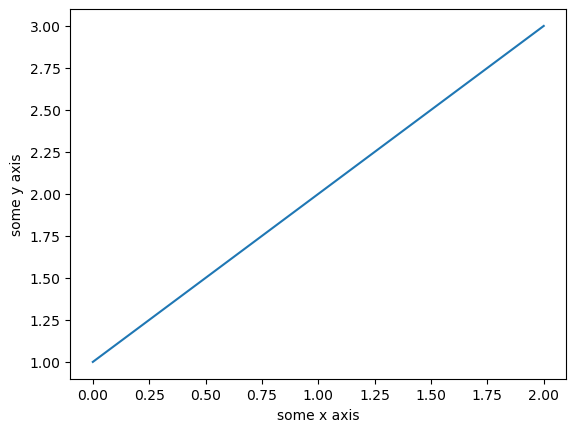

In [81]:
# Basic line plot using Matplotlib and print full details
import matplotlib.pyplot as plt
import numpy

# Prepare data
myarray = numpy.array([1, 2, 3])                  # 1D array for plotting

# Plot line
plt.plot(myarray)                                  # Plot y-values vs. index (0,1,2)

# Customize plot
plt.xlabel('some x axis')                          # Label for x-axis
plt.ylabel('some y axis')                          # Label for y-axis

# Save figure to file
plt.savefig("plot2d.png")                          # Save the plot as PNG

# Show plot
plt.show()                                         # Display the plot

### Scatter Plot

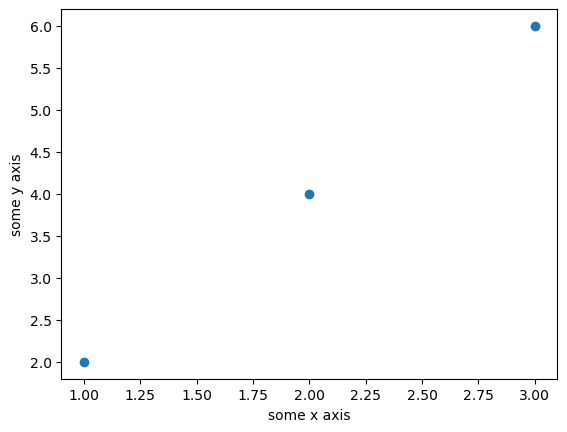

In [82]:
# Basic scatter plot using Matplotlib and print full details
import matplotlib.pyplot as plt
import numpy

# Prepare data
x = numpy.array([1, 2, 3])                        # x-coordinates
y = numpy.array([2, 4, 6])                        # y-coordinates

# Plot scatter
plt.scatter(x, y)                                 # Create scatter plot of x vs y

# Customize plot
plt.xlabel('some x axis')                         # Label for x-axis
plt.ylabel('some y axis')                         # Label for y-axis

# Save figure to file
plt.savefig("scatter2d.png")                      # Save the scatter plot as PNG

# Show plot
plt.show()                                        # Display the plot

# KẾT THÚC